# Labolatorium nr 12

## Import bibliotek oraz ich konfiguracja

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import scipy as sp

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Funkcje

In [106]:
def f1(x):
    return np.exp(-x**2) * np.power(np.log(x),2)

def f2(x):
    return 1/(np.power(x,3) - 2*x - 5)

def f3(x):
    return np.power(x,5)*np.exp(-x)*np.sin(x)

def f4(x,y):
    return 1/(np.sqrt(x+y) * (1+x+y))

def f5(x,y):
    return np.power(x,2) + np.power(y,2)

## Zadanie 1 - Próbki prędkości i przebyta droga

In [107]:
v = [10, 100, 150, 30, 60]
t = [0, 20, 40, 60, 80]

def trapz(y, x):
    result = []
    result2 = [0]
    for i in range(1, len(y)):
        result.append((y[i-1] + y[i]) * (x[i] - x[i-1]) / 2)
        result2.append(result2[i-1] + result[i-1])

    return result2, np.sum(result)


res, k = trapz(v, t)
np_k = np.trapz(v, t)
assert np.isclose(k, np_k)

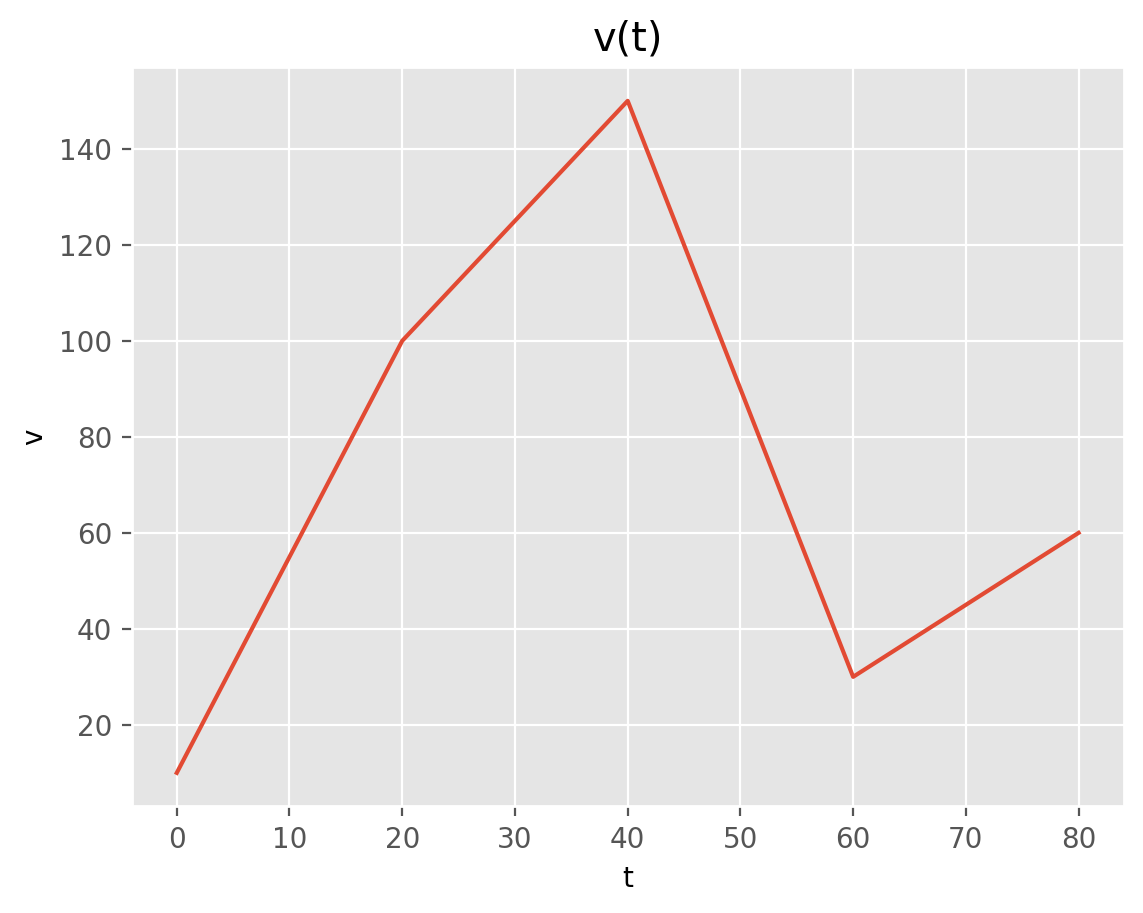

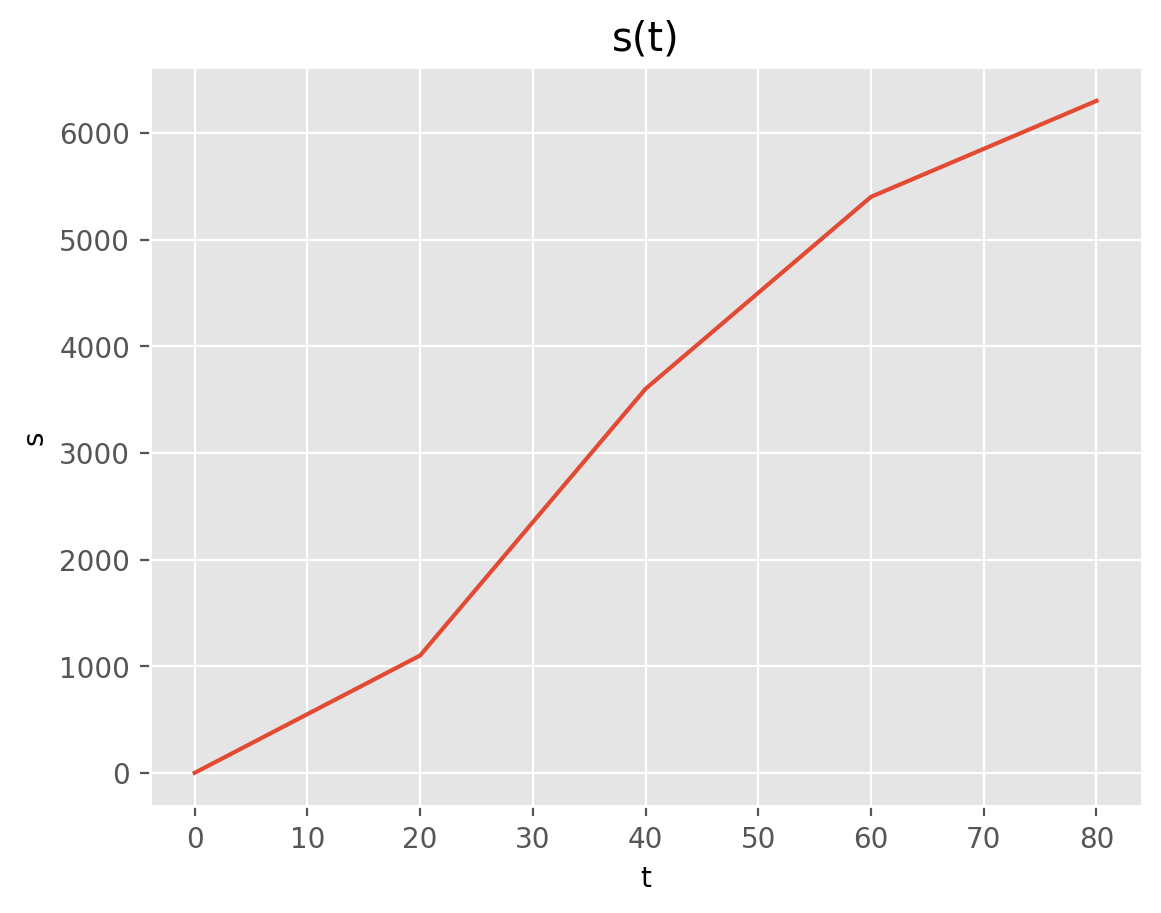

In [108]:
# Plot
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v')
plt.title('v(t)')
plt.show()

plt.plot(t, res)
plt.xlabel('t')
plt.ylabel('s')
plt.title('s(t)')
plt.show()


##  Zadanie 2 - Złożona kwadratura Simpsona

In [115]:
def simpson(y, x):
    result = []
    
    for i in range(0, len(x)-1, 2):
        result.append((x[i+1]-x[i]) * (y[i] + 4*y[i+1] + y[i+2]) / 3)

    return np.sum(result)

k = simpson(v, t)
np_k = sp.integrate.simps(v, t)
print(k)
print(np_k)
assert np.isclose(k, np_k)

5933.333333333334
5933.333333333334


## Zadanie 3 - Oznaczone całki podwójne

In [95]:
def integrate_2d(f, x_range, y_range, num_points=100):
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    dx = x_vals[1] - x_vals[0]
    dy = y_vals[1] - y_vals[0]

    integral = 0.0
    for i in range(num_points):
        for j in range(num_points):
            x = x_vals[i]
            y = y_vals[j]
            value = f(x, y)
            if i == 0 or i == num_points - 1:
                value *= 0.5
            if j == 0 or j == num_points - 1:
                value *= 0.5
            integral += value

    integral *= dx * dy

    return integral

# Define the range of integration
x_range = [0.00001, 1]
y_range = [0.00001, 1]

# Call the integration function
result = integrate_2d(f4, x_range, y_range)
print("Integral result:", result)
true_result = sp.integrate.dblquad(f4, x_range[0], x_range[1], lambda x: y_range[0], lambda x: y_range[1])[0]
print("True result:", true_result)

Integral result: 0.6257370042765747
True result: 0.6202559801231355


In [97]:
import numpy as np

def double_integral_trapezoidal(f, x_range, y_range, num_points=100):
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    dx = x_vals[1] - x_vals[0]
    dy = y_vals[1] - y_vals[0]

    integral = 0.0
    for i in range(num_points - 1):
        for j in range(num_points - 1):
            x = x_vals[i:i+2]
            y = y_vals[j:j+2]
            f_values = f(x[:, np.newaxis], y)
            integral += (f_values[0, 0] + f_values[1, 0] + f_values[0, 1] + f_values[1, 1]) / 4

    integral *= dx * dy

    return integral

# Define the range of integration
x_range = [0, 1]
y_range = [0, 1]

result = double_integral_trapezoidal(f5, x_range, y_range)
print("Double integral result:", result)
true_result = sp.integrate.dblquad(f5, x_range[0], x_range[1], lambda x: y_range[0], lambda x: y_range[1])[0]
print("True result:", true_result)

Double integral result: 0.6667006768016871
True result: 0.6666666666666667


0.6666666666666667


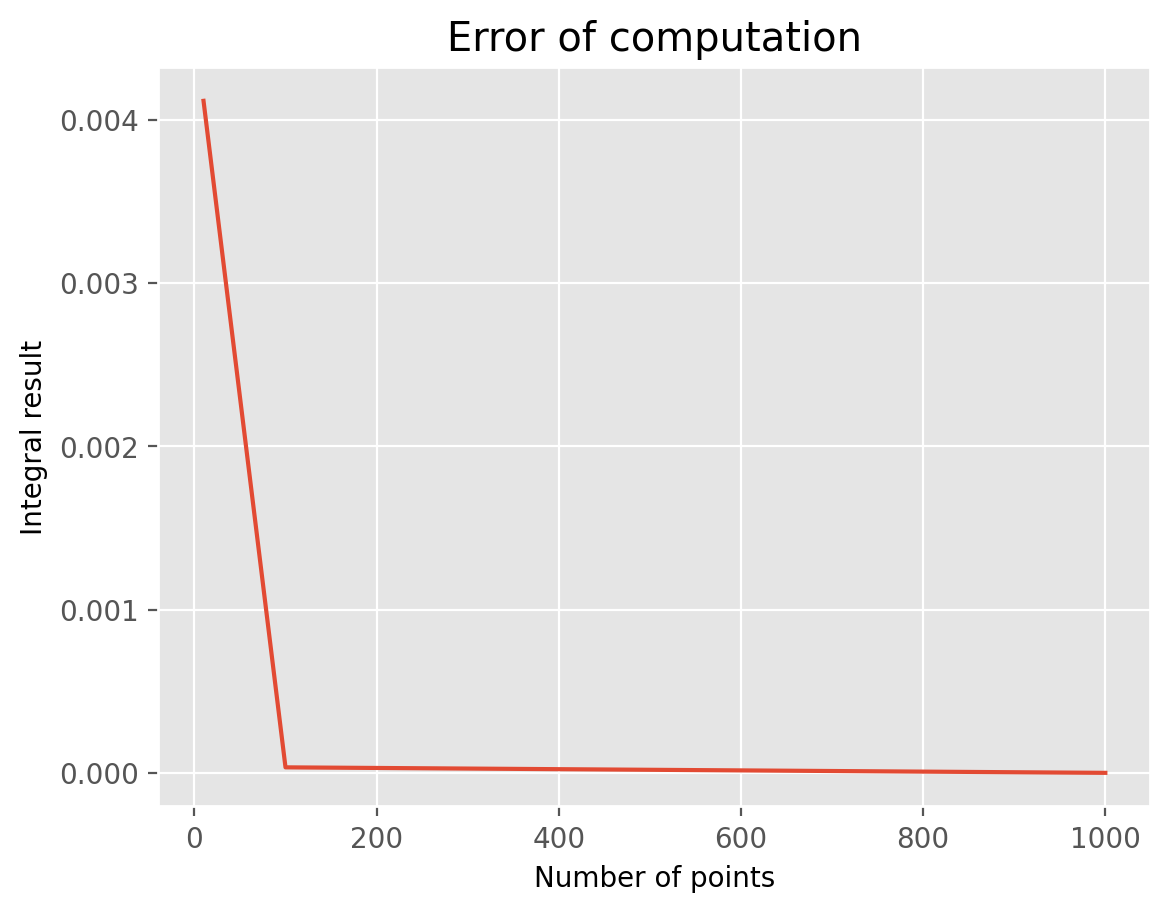

In [116]:
num_points = [10, 100, 1000]

true_result = sp.integrate.dblquad(f5, 0, 1, lambda x: 0, lambda x: 1)[0]

print(true_result)

results = []
for num in num_points:
    result = double_integral_trapezoidal(f5, x_range, y_range, num_points=num)
    results.append(abs(true_result - result))

plt.plot(num_points, results)
plt.xlabel('Number of points')
plt.ylabel('Integral result')
plt.title('Error of computation')
plt.show()